# A RANGA RAVINDRA
# BL.EN.U4AIE21002

# A1. Use librosa.effects.trim()to remove the silence parts of speech from beginning and end of your recorded signal.Listen to the new signal and perceptually compare the audio with original.

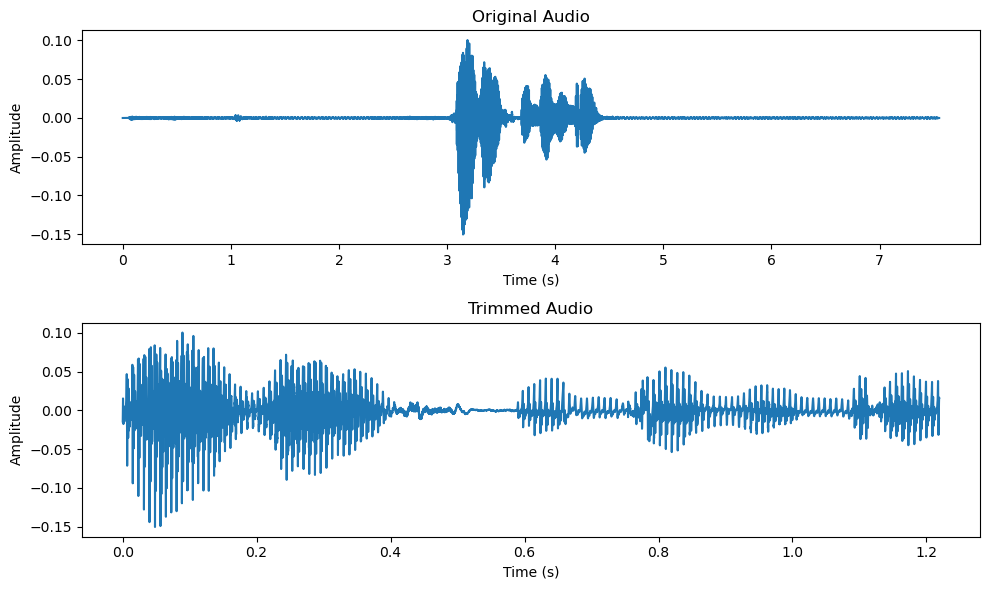

Original Audio:


Trimmed Audio:


In [2]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
original_audio_file = "Trim.wav"
y, sr = librosa.load(original_audio_file, sr=None)

trimmed_y, index = librosa.effects.trim(y, top_db=10)
 
plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y)) / sr, y)
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Trimming the beginning and ending silence
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(trimmed_y)) / sr, trimmed_y)
plt.title('Trimmed Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

print("Original Audio:")
display(Audio(data=y, rate=sr))

print("Trimmed Audio:")
display(Audio(trimmed_y, rate=sr))


# A2. Use librosa.effects.split()to splitthe recorded speech with detected silences.Play around with the top_db parameter and see the effects of split. Listen to the generated signals and observe the split quality.

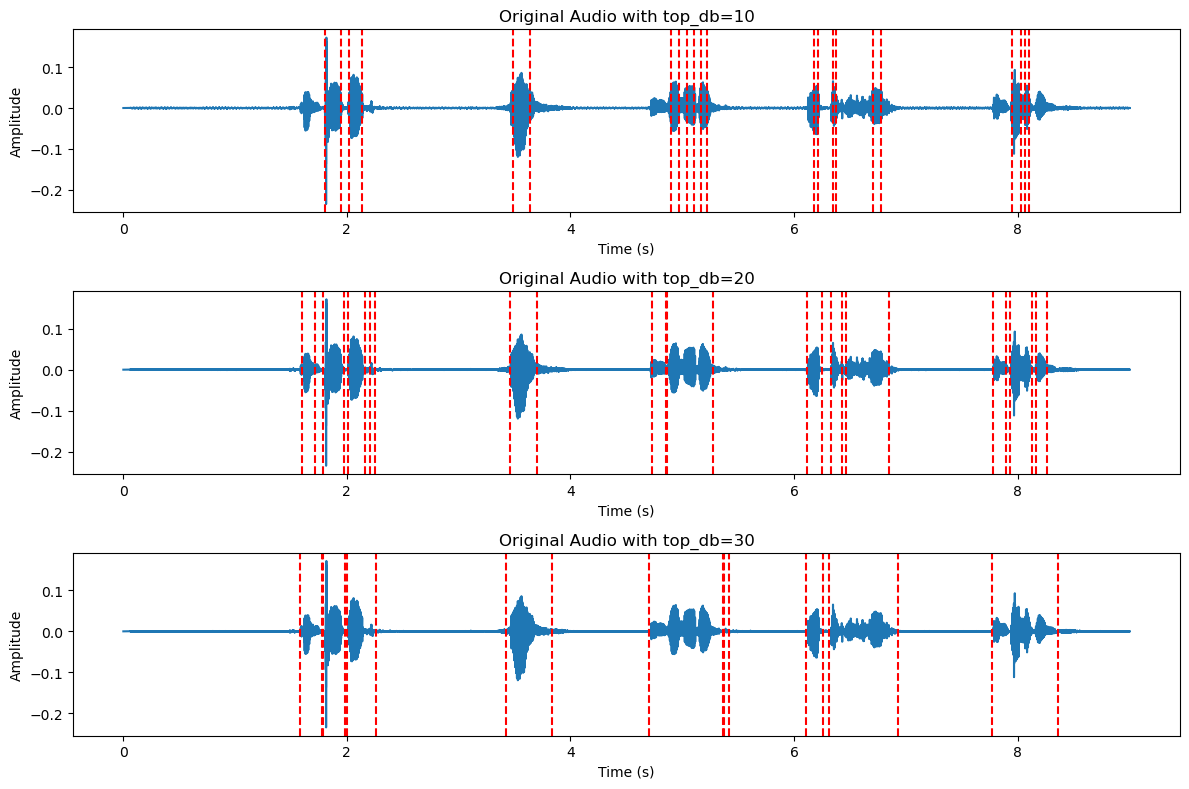

Split Audio with top_db=10:


Split Audio with top_db=20:


Split Audio with top_db=30:


In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

original_audio_file = "Split.wav"
y, sr = librosa.load(original_audio_file, sr=None)

top_db_values = [10,20,30]  # different top_db values

plt.figure(figsize=(12, 8))

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    plt.subplot(len(top_db_values), 1, i + 1)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title(f'Original Audio with top_db={top_db}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    for interval in intervals:
        plt.axvline(interval[0] / sr, color='red', linestyle='--')
        plt.axvline(interval[1] / sr, color='red', linestyle='--')

plt.tight_layout()
plt.show()

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    split_audio = np.concatenate([y[start:end] for start, end in intervals])

    print(f"Split Audio with top_db={top_db}:")
    ipd.display(ipd.Audio(split_audio, rate=sr))
